In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn as sk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cross_validation import train_test_split

/home/fcheung/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data1 = pd.read_table('menuitems.normalized', " [+] ", engine = 'python', header = None)

In [4]:
data2 = data1.drop(5, axis=1)
data2[4] = data2[4].astype(str)
data2 = data2.groupby([3])[4].apply(lambda x: ' '.join(x)).reset_index()

In [5]:
data1.head()

,0,1,2,3,4,5
0,Tiffin Etc.,indian,philadelphia,$$,aloo paratha mashed potatoes flavored with tan...,3.5
1,Tiffin Etc.,indian,philadelphia,$$,paneer do pyaza roll homemade cottage cheese a...,8.0
2,Tiffin Etc.,indian,philadelphia,$$,masala aloo roll pan fried spiced potatoes and...,5.5
3,Tiffin Etc.,indian,philadelphia,$$,bhuna chicken roll tender fire roasted chicken...,6.5
4,Tiffin Etc.,indian,philadelphia,$$,murg tikka roll tandoori chicken kebabs with c...,6.5


In [6]:
data1.groupby([3]).count()

,0,1,2,4,5
3,,,,,
$,251440,251440,251440,251439,249034
$$,290879,290923,290923,290916,288508
$$$,42269,42287,42287,42287,42114
$$$$,7330,7330,7330,7330,7330


In [7]:
data1.head()

,0,1,2,3,4,5
0,Tiffin Etc.,indian,philadelphia,$$,aloo paratha mashed potatoes flavored with tan...,3.5
1,Tiffin Etc.,indian,philadelphia,$$,paneer do pyaza roll homemade cottage cheese a...,8.0
2,Tiffin Etc.,indian,philadelphia,$$,masala aloo roll pan fried spiced potatoes and...,5.5
3,Tiffin Etc.,indian,philadelphia,$$,bhuna chicken roll tender fire roasted chicken...,6.5
4,Tiffin Etc.,indian,philadelphia,$$,murg tikka roll tandoori chicken kebabs with c...,6.5


In [8]:
data2.head()

,3,4
0,$,garden salad w cheese spaghetti or penne regul...
1,$$,aloo paratha mashed potatoes flavored with tan...
2,$$$,pennsylvania chicken stew of plum tomatoes oli...
3,$$$$,saccotino saloon salad mixed greens onion pepp...


In [9]:
data2#.loc[[3],[4]]

,3,4
0,$,garden salad w cheese spaghetti or penne regul...
1,$$,aloo paratha mashed potatoes flavored with tan...
2,$$$,pennsylvania chicken stew of plum tomatoes oli...
3,$$$$,saccotino saloon salad mixed greens onion pepp...


In [30]:
word_low = data2.loc[0,4]+data2.loc[1,4]
word_high = data2.loc[2,4]

In [57]:
v = TfidfVectorizer(stop_words = 'english', max_features=1000)

In [58]:
y = v.fit_transform([word_low, word_high])

In [59]:
y.shape

(2, 1000)

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

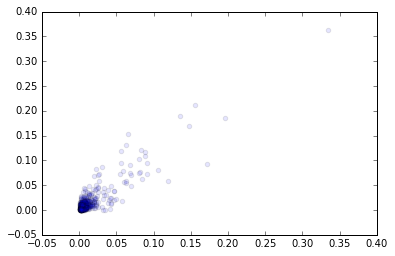

In [61]:
plt.scatter(y.toarray()[0,500:], y.toarray()[1,500:], alpha = 0.1)

In [14]:
words = pd.Series(v.get_feature_names())

In [16]:
type(x)

scipy.sparse.csr.csr_matrix

In [17]:
x.shape

(4, 47897)

In [18]:
df_corpus = pd.DataFrame(x.toarray().T, columns=['0','1','2','3'])
df_corpus.columns

Index([u'0', u'1', u'2', u'3'], dtype='object')

In [27]:
df_corpus2 = np.array(df_corpus)

In [20]:
rest0 = df_corpus.sort_values('0', ascending=False).head(50).index #[11:20]
rest1 = df_corpus.sort_values('1', ascending=False).head(50).index #[11:20]
rest2 = df_corpus.sort_values('2', ascending=False).head(50).index #[11:20]
rest3 = df_corpus.sort_values('3', ascending=False).head(50).index #[11:20]

In [21]:
words.shape

(47897,)

In [2]:
?train_test_split